In [1]:
import pandas as pd          
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('Train.csv')

In [3]:
test = pd.read_csv('Test.csv')

In [4]:
train_original = train.copy()
test_original = test.copy()

In [5]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [6]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [7]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [8]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [9]:
train.shape

(18288, 3)

In [10]:
test.shape

(5112, 2)

In [11]:
train.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


We will extract the time and date from the Datetime. We have seen earlier that the data type of Datetime is object. So first of all we have to change the data type to datetime format otherwise we can not extract features from it.

In [12]:
train['Datetime'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M')

In [13]:
train.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [14]:
test['Datetime'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M')

In [15]:
train_original['Datetime'] = pd.to_datetime(train_original['Datetime'],format='%d-%m-%Y %H:%M')

In [16]:
test_original['Datetime'] = pd.to_datetime(test_original['Datetime'],format='%d-%m-%Y %H:%M')

### Hypothesis generation

Hypothesis generation helps us to point out the factors which might affect our dependent variable. Below are some of the hypotheses which I think can affect the passenger count(dependent variable for this time series problem) on the JetRail:

1. There will be an increase in the traffic as the years pass by.
2. The traffic will be high from May to October.
3. Traffic on weekdays will be more as compared to weekends/holidays.
4. Traffic during the peak hours will be high.

We made some hypothesis for the effect of hour, day, month and year on the passenger count. So, let’s extract the year, month, day and hour from the Datetime to validate our hypothesis.

In [17]:
for i in (train, test, test_original, train_original):
    i['year']=i.Datetime.dt.year 
    i['month']=i.Datetime.dt.month 
    i['day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour 

In [18]:
train.head()

,ID,Datetime,Count,year,month,day,Hour
0,0,2012-08-25 00:00:00,8,2012,8,25,0
1,1,2012-08-25 01:00:00,2,2012,8,25,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2
3,3,2012-08-25 03:00:00,2,2012,8,25,3
4,4,2012-08-25 04:00:00,2,2012,8,25,4


In [19]:
train['day of week']=train['Datetime'].dt.dayofweek 
temp = train['Datetime']

In [20]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5


In [21]:
def weekend(row):
    if row.dayofweek == 5 or row.dayofweek == 6:
        return 1
    else:
        return 0

In [22]:
temp2 = train['Datetime'].apply(weekend) 

In [23]:
train['weekend'] = temp2

In [24]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


#### Visualize the Time Series

In [25]:
train.index = train['Datetime'] # indexing the Datetime to get the time period on the x-axis. 

In [26]:
df=train.drop('ID',1)           # drop ID variable to get only the Datetime on x-axis. 

In [27]:
ts = df['Count'] 

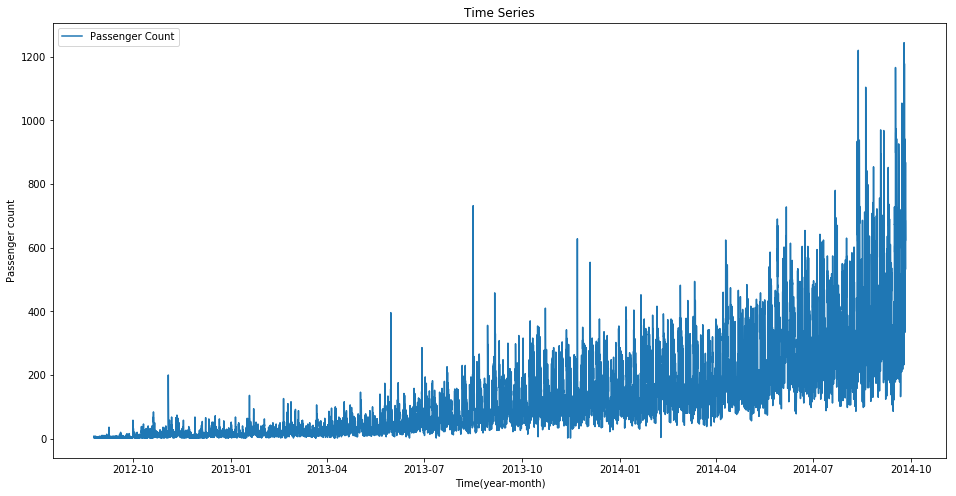

In [28]:
plt.figure(figsize=(16,8)) 
plt.plot(ts, label='Passenger Count') 
plt.title('Time Series') 
plt.xlabel("Time(year-month)") 
plt.ylabel("Passenger count") 
plt.legend(loc='best')

Here we can infer that there is an increasing trend in the series, i.e., the number of count is increasing with respect to time. We can also see that at certain points there is a sudden increase in the number of counts. The possible reason behind this could be that on particular day, due to some event the traffic was high.

   #### Exploratory Analysis

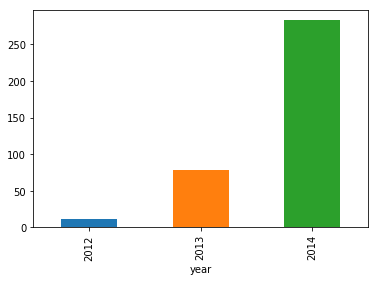

In [29]:
train.groupby('year')['Count'].mean().plot.bar()

    We see an exponential growth in the traffic with respect to year which validates our hypothesis.

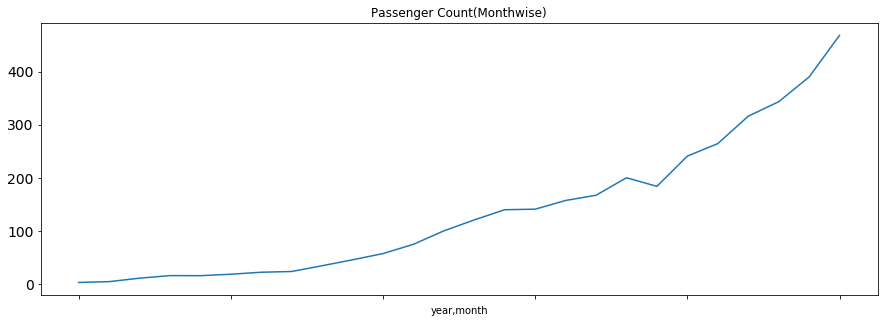

In [30]:
train.groupby(['year','month'])['Count'].mean().plot(figsize=(15,5), title= 'Passenger Count(Monthwise)', fontsize=14)


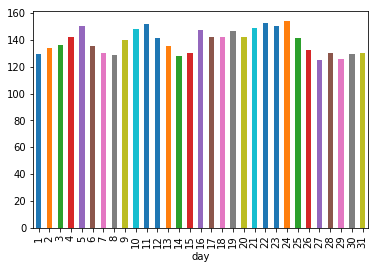

In [31]:
train.groupby('day')['Count'].mean().plot.bar()

    We are not getting much insights from day wise count of the passengers.

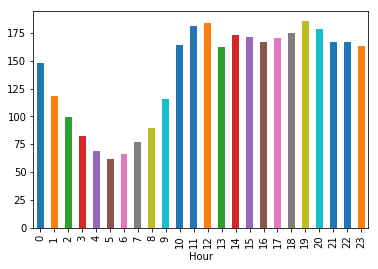

In [32]:
train.groupby('Hour')['Count'].mean().plot.bar()

    It can be inferred that the peak traffic is at 7 PM and then we see a decreasing trend till 5 AM.
    After that the passenger count starts increasing again and peaks again between 11AM and 12 Noon.

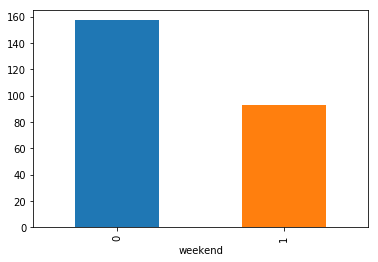

In [33]:
train.groupby('weekend')['Count'].mean().plot.bar()

It can be inferred from the above plot that the traffic is more on weekdays as compared to weekends which validates our hypothesis.

In [34]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,,
2012-08-25 00:00:00,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


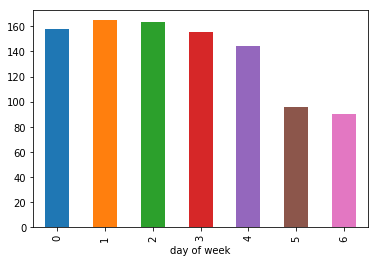

In [35]:
train.groupby('day of week')['Count'].mean().plot.bar()

From the above bar plot, we can infer that the passenger count is less for saturday and sunday as compared to the other days of the week.

In [36]:
train = train.drop('ID',1)

In [37]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend
Datetime,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1


In [38]:
train['Timestamp'] = pd.to_datetime(train['Datetime'],format='%d-%m-%Y %H:%M') 

In [39]:
train.head()

,Datetime,Count,year,month,day,Hour,day of week,weekend,Timestamp
Datetime,,,,,,,,,
2012-08-25 00:00:00,2012-08-25 00:00:00,8,2012,8,25,0,5,1,2012-08-25 00:00:00
2012-08-25 01:00:00,2012-08-25 01:00:00,2,2012,8,25,1,5,1,2012-08-25 01:00:00
2012-08-25 02:00:00,2012-08-25 02:00:00,6,2012,8,25,2,5,1,2012-08-25 02:00:00
2012-08-25 03:00:00,2012-08-25 03:00:00,2,2012,8,25,3,5,1,2012-08-25 03:00:00
2012-08-25 04:00:00,2012-08-25 04:00:00,2,2012,8,25,4,5,1,2012-08-25 04:00:00


In [40]:
# Hourly time series 
hourly = train.resample('H').mean() 

In [41]:
# Converting to daily mean 
daily = train.resample('D').mean() 

In [42]:
# Converting to weekly mean 
weekly = train.resample('W').mean() 

In [43]:
# Converting to monthly mean 
monthly = train.resample('M').mean()

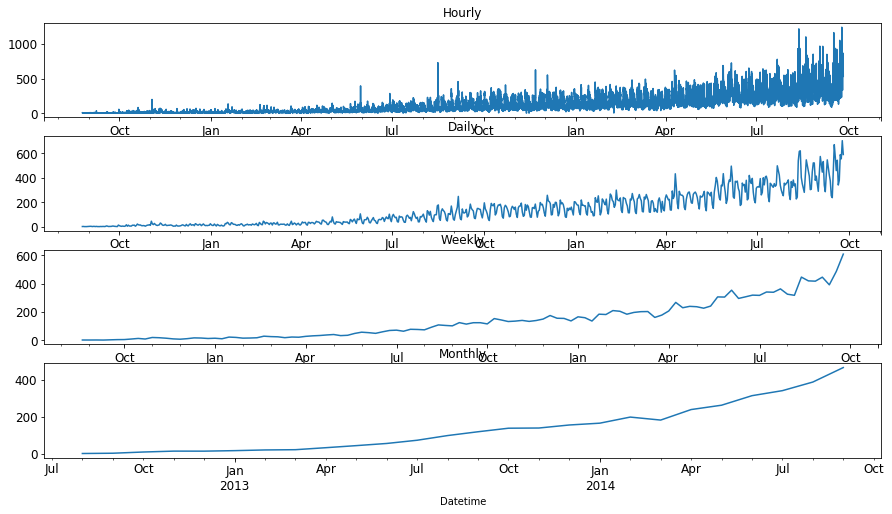

In [44]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=12, ax=axs[0]) 
daily.Count.plot(figsize=(15,8), title= 'Daily', fontsize=12, ax=axs[1]) 
weekly.Count.plot(figsize=(15,8), title= 'Weekly', fontsize=12, ax=axs[2]) 
monthly.Count.plot(figsize=(15,8), title= 'Monthly', fontsize=12, ax=axs[3]) 

In [45]:
test['Timestamp'] = pd.to_datetime(test['Datetime'],format='%d-%m-%Y %H:%M') 

In [46]:
test.head()

,ID,Datetime,year,month,day,Hour,Timestamp
0,18288,2014-09-26 00:00:00,2014,9,26,0,2014-09-26 00:00:00
1,18289,2014-09-26 01:00:00,2014,9,26,1,2014-09-26 01:00:00
2,18290,2014-09-26 02:00:00,2014,9,26,2,2014-09-26 02:00:00
3,18291,2014-09-26 03:00:00,2014,9,26,3,2014-09-26 03:00:00
4,18292,2014-09-26 04:00:00,2014,9,26,4,2014-09-26 04:00:00


In [47]:
test.index = test.Timestamp  

In [48]:
test.head()

,ID,Datetime,year,month,day,Hour,Timestamp
Timestamp,,,,,,,
2014-09-26 00:00:00,18288,2014-09-26 00:00:00,2014,9,26,0,2014-09-26 00:00:00
2014-09-26 01:00:00,18289,2014-09-26 01:00:00,2014,9,26,1,2014-09-26 01:00:00
2014-09-26 02:00:00,18290,2014-09-26 02:00:00,2014,9,26,2,2014-09-26 02:00:00
2014-09-26 03:00:00,18291,2014-09-26 03:00:00,2014,9,26,3,2014-09-26 03:00:00
2014-09-26 04:00:00,18292,2014-09-26 04:00:00,2014,9,26,4,2014-09-26 04:00:00


In [49]:
test = test.resample('D').mean() 

In [50]:
train.index = train.Timestamp 

In [51]:
train = train.resample('D').mean()

Creating validation set

In [52]:
Train = train.loc['2012-08-25':'2014-06-24'] 
valid = train.loc['2014-06-25':'2014-09-25']

In [53]:
Train.shape

(669, 7)

In [54]:
valid.shape

(93, 7)

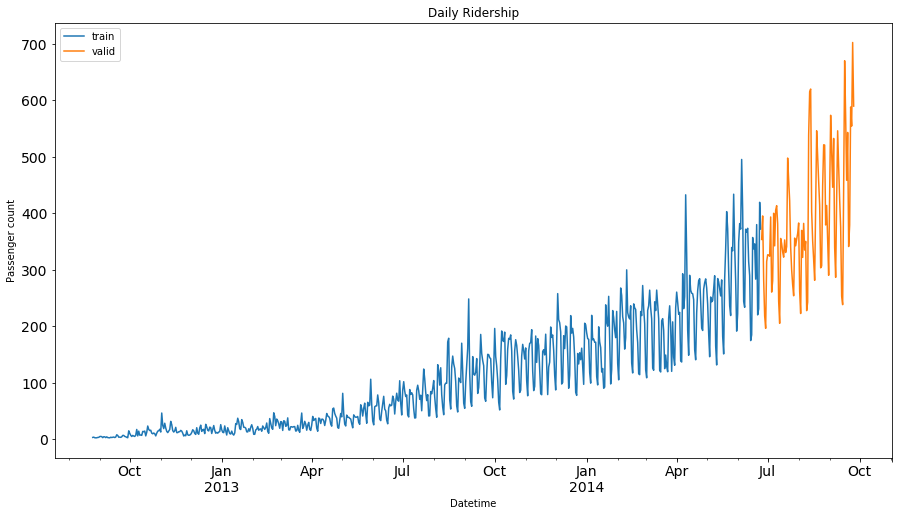

In [55]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()

we will use four methods for this forecasting,
1. Naive approach
2. Moving Average
3. Simple exponential smoothing
4. Holt's Linear trend model

##### Naive Approach

In [56]:
dd = np.asarray(Train.Count)

In [57]:
y_hat = valid.copy()

In [58]:
y_hat['naive'] = dd[len(dd)-1]

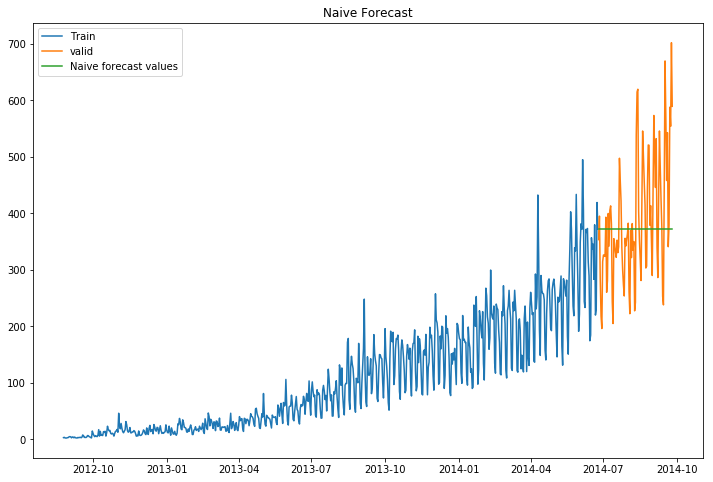

In [59]:
plt.figure(figsize=(12,8)) 
plt.plot(Train.index, Train['Count'], label='Train')
plt.plot(valid.index, valid['Count'], label='valid')
plt.plot(y_hat.index, y_hat['naive'], label='Naive forecast values')
plt.legend(loc='best') 
plt.title("Naive Forecast") 
plt.show()

We can calculate how accurate our predictions are using rmse(Root Mean Square Error).
rmse is the standard deviation of the residuals.
Residuals are a measure of how far from the regression line data points are

In [60]:
from sklearn.metrics import mean_squared_error

In [61]:
from math import sqrt

In [62]:
rmse = sqrt(mean_squared_error(valid['Count'],y_hat['naive']))

In [63]:
rmse

111.79050467496724

We can infer that this method is not suitable for datasets with high variability. We can reduce the rmse value by adopting different techniques.

##### Moving average

In [64]:
Train['Count'].rolling(10).mean()[-1]

313.0333333333333

In [65]:
y_hat = valid.copy()

In [66]:
y_hat['Moving Average'] = Train['Count'].rolling(10).mean()[-1]

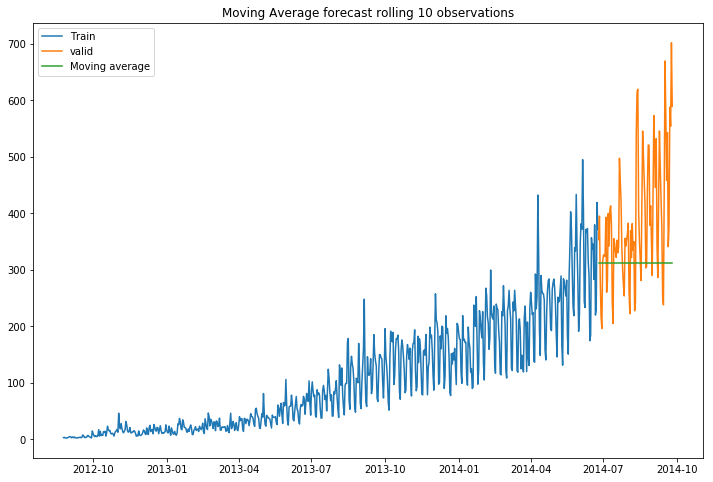

In [67]:
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'], label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'valid')
plt.plot(y_hat.index, y_hat['Moving Average'], label = 'Moving average')
plt.legend(loc='best')
plt.title('Moving Average forecast rolling 10 observations')
plt.show()

In [68]:
rmse = sqrt(mean_squared_error(valid['Count'],y_hat['Moving Average']))

In [69]:
rmse

134.23733308950264

let's try moving average with 20 observations

In [70]:
y_hat = valid.copy()

In [71]:
y_hat['Moving Average'] = Train['Count'].rolling(20).mean()[-1]

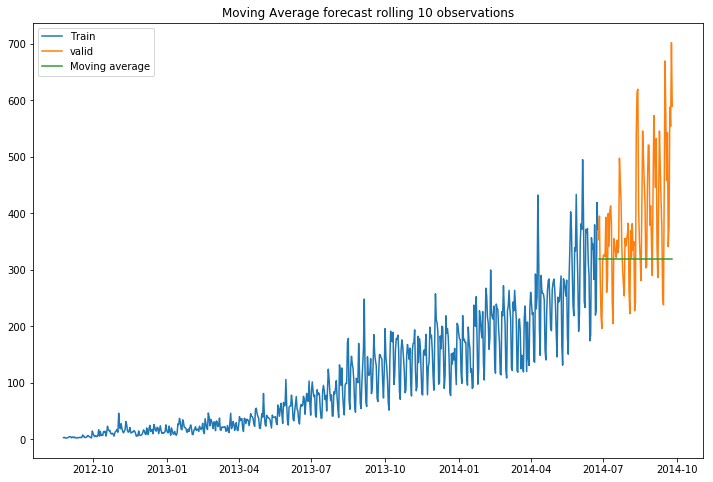

In [72]:
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'], label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'valid')
plt.plot(y_hat.index, y_hat['Moving Average'], label = 'Moving average')
plt.legend(loc='best')
plt.title('Moving Average forecast rolling 10 observations')
plt.show()

In [73]:
rmse = sqrt(mean_squared_error(valid['Count'],y_hat['Moving Average']))

In [74]:
rmse

130.44984977550422

Moving average with 50 observations

In [75]:
y_hat = valid.copy()

In [76]:
y_hat['Moving Average'] = Train['Count'].rolling(50).mean()[-1]

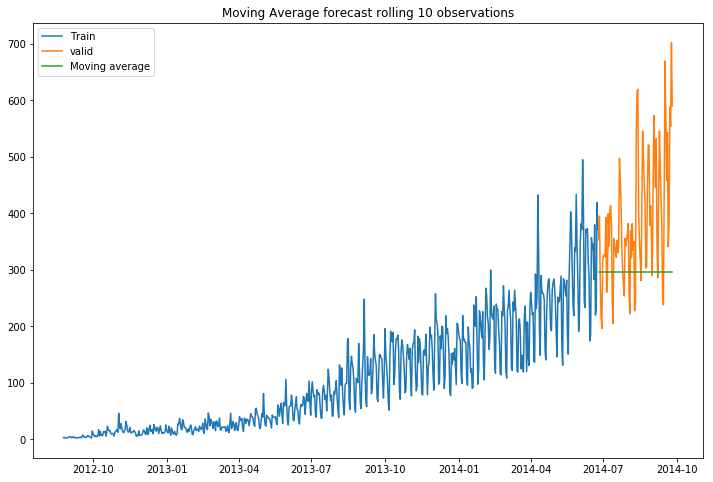

In [77]:
plt.figure(figsize=(12,8))
plt.plot(Train.index,Train['Count'], label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'valid')
plt.plot(y_hat.index, y_hat['Moving Average'], label = 'Moving average')
plt.legend(loc='best')
plt.title('Moving Average forecast rolling 10 observations')
plt.show()

In [78]:
rmse = sqrt(mean_squared_error(valid['Count'],y_hat['Moving Average']))

In [79]:
rmse

144.19175679986802

Simple exponential smoothing

In [80]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

In [81]:
y_hat_avg = valid.copy() 

In [82]:
fit2 = SimpleExpSmoothing(np.asarray(Train['Count'])).fit(smoothing_level=0.6,optimized=False)

In [83]:
y_hat_avg['SES'] = fit2.forecast(len(valid)) 

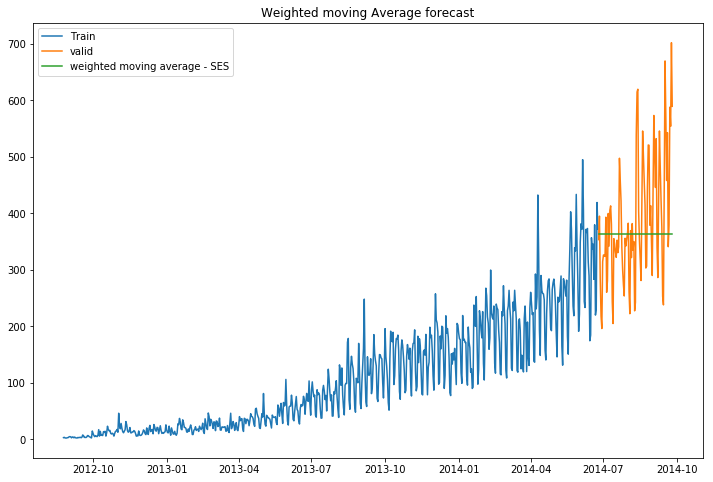

In [84]:
plt.figure(figsize=(12,8))
plt.plot(Train.index, Train['Count'], label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'valid')
plt.plot(y_hat_avg.index, y_hat_avg['SES'], label = 'weighted moving average - SES')
plt.legend(loc='best')
plt.title('Weighted moving Average forecast')
plt.show()

In [85]:
rmse = sqrt(mean_squared_error(valid['Count'],y_hat_avg['SES']))

In [86]:
rmse

113.43708111884514

We can infer that the fit of the model has improved as the rmse value has reduced.

##### Holt's Linear Trend Model

In [87]:
import statsmodels.api as sm 

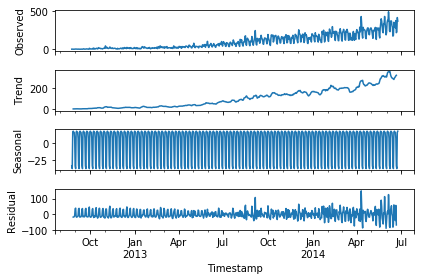

In [88]:
sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(train.Count) 
plt.show()

An increasing trend can be seen in the dataset, so now we will make a model based on the trend.

In [89]:
y_hat_avg = valid.copy()

In [90]:
from statsmodels.tsa.api import Holt

In [91]:
fit1 = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3, smoothing_slope = 0.1)

In [92]:
y_hat_avg['holt_linear'] = fit1.forecast(len(valid))

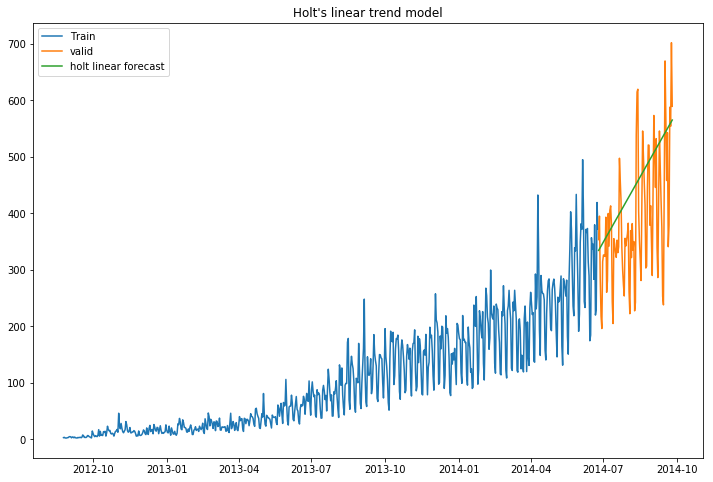

In [93]:
plt.figure(figsize = (12,8))
plt.plot(Train.index, Train['Count'], label = 'Train')
plt.plot(valid.index, valid['Count'], label = 'valid')
plt.plot(y_hat_avg.index, y_hat_avg['holt_linear'], label = 'holt linear forecast')
plt.legend(loc='best')
plt.title('Holt\'s linear trend model')
plt.show()

We can see an inclined line here as the model has taken into consideration the trend of the time series.

In [94]:
rmse = sqrt(mean_squared_error(valid['Count'], y_hat_avg['holt_linear']))

In [95]:
rmse

112.94278345314041

#### Using Bolt's Linear model for predicting no. of customers on the test set

In [96]:
submission = pd.read_csv("Sample_Submission.csv")

In [97]:
predict = fit1.forecast(len(test))
test['prediction']=predict

In [98]:
# Calculating the hourly ratio of count 
train_original['ratio']=train_original['Count']/train_original['Count'].sum() 

In [99]:
# Grouping the hourly ratio 
temp = train_original.groupby(['Hour'])['ratio'].sum() 

In [100]:
pd.DataFrame(temp, columns=['Hour','ratio']).to_csv('GROUPby.csv') 

In [101]:
temp2=pd.read_csv("GROUPby.csv") 

In [102]:
temp2=temp2.drop('Hour.1',1) 

In [103]:
temp2.head()

,Hour,ratio
0,0,0.044287
1,1,0.035343
2,2,0.029911
3,3,0.024714
4,4,0.020802


In [104]:
# Merge Test and test_original on day, month and year 
merge = pd.merge(test, test_original, on=('day','month', 'year'), how='left') 
merge['Hour'] = merge['Hour_y'] 

In [105]:
merge.head()

,ID_x,year,month,day,Hour_x,prediction,ID_y,Datetime,Hour_y,Hour
0,18299.5,2014.0,9.0,26.0,11.5,334.650767,18288,2014-09-26 00:00:00,0,0
1,18299.5,2014.0,9.0,26.0,11.5,334.650767,18289,2014-09-26 01:00:00,1,1
2,18299.5,2014.0,9.0,26.0,11.5,334.650767,18290,2014-09-26 02:00:00,2,2
3,18299.5,2014.0,9.0,26.0,11.5,334.650767,18291,2014-09-26 03:00:00,3,3
4,18299.5,2014.0,9.0,26.0,11.5,334.650767,18292,2014-09-26 04:00:00,4,4


In [106]:
merge = merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

In [107]:
merge.head()

,ID_x,day,prediction,ID_y,Hour
0,18299.5,26.0,334.650767,18288,0
1,18299.5,26.0,334.650767,18289,1
2,18299.5,26.0,334.650767,18290,2
3,18299.5,26.0,334.650767,18291,3
4,18299.5,26.0,334.650767,18292,4


In [108]:
prediction = pd.merge(merge, temp2, on='Hour', how='left') 

In [109]:
prediction.head()

,ID_x,day,prediction,ID_y,Hour,ratio
0,18299.5,26.0,334.650767,18288,0,0.044287
1,18299.5,26.0,334.650767,18289,1,0.035343
2,18299.5,26.0,334.650767,18290,2,0.029911
3,18299.5,26.0,334.650767,18291,3,0.024714
4,18299.5,26.0,334.650767,18292,4,0.020802


In [110]:
prediction.tail()

,ID_x,day,prediction,ID_y,Hour,ratio
5107,23387.5,26.0,866.398583,23395,19,0.055627
5108,23387.5,26.0,866.398583,23396,20,0.053455
5109,23387.5,26.0,866.398583,23397,21,0.049895
5110,23387.5,26.0,866.398583,23398,22,0.050076
5111,23387.5,26.0,866.398583,23399,23,0.048892


In [111]:
# Converting the ratio to the original scale 
prediction['Count'] = prediction['prediction']*prediction['ratio']*24 
prediction['ID'] = prediction['ID_y']

In [112]:
submission=prediction.drop(['ID_x', 'day', 'ID_y','prediction','Hour', 'ratio'],axis=1) 

In [113]:
pd.DataFrame(submission, columns=['ID','Count']).to_csv('Holt linear.csv',index = False)

#### Holt's Winter Model - exp smoothing to seasonality along with trend and level

In [114]:
y_hat_avg = valid.copy() 

In [115]:
fit1 = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 

In [116]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(valid)) 

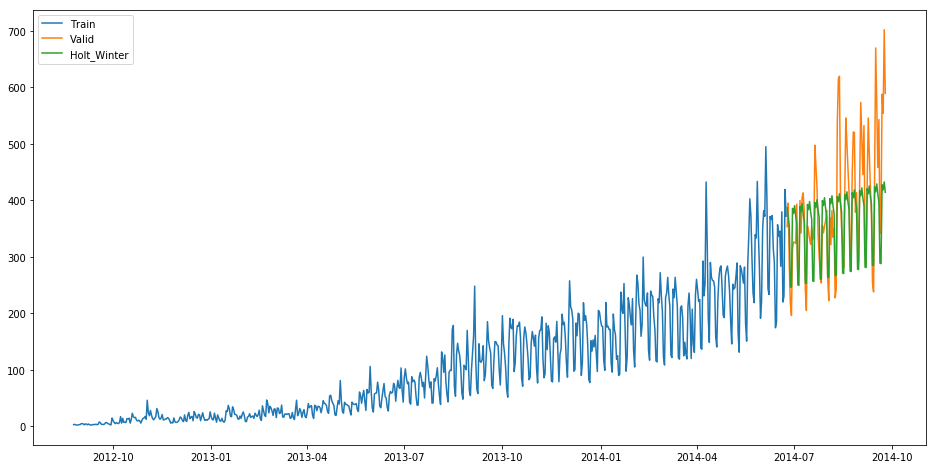

In [117]:
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(valid['Count'], label='Valid') 
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()

In [118]:
rmse = sqrt(mean_squared_error(valid.Count, y_hat_avg.Holt_Winter)) 

In [119]:
rmse

82.37527095912128

In [120]:
predict=fit1.forecast(len(test))

In [121]:
test['prediction'] = predict

In [122]:
merge = pd.merge(test, test_original, on=('day','month', 'year'), how='left') 

In [123]:
merge['Hour'] = merge['Hour_y'] 

In [124]:
merge = merge.drop(['year', 'month', 'Datetime','Hour_x','Hour_y'], axis=1) 

In [125]:
prediction = pd.merge(merge, temp2, on='Hour', how='left') 

In [126]:
prediction['Count'] = prediction['prediction']*prediction['ratio']*24

In [127]:
prediction['ID'] = prediction['ID_y'] 

In [128]:
submission = prediction.drop(['day','Hour','ratio','prediction', 'ID_x', 'ID_y'],axis=1)

In [129]:
pd.DataFrame(submission, columns = ['ID','Count']).to_csv('Holt winters.csv')